# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

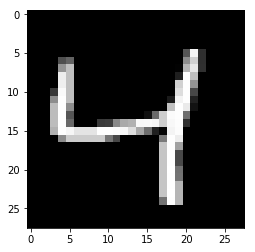

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, shape=[None, 784])
targets_ = tf.placeholder(tf.float32, shape=[None, 784])

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, 784, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6932
Epoch: 1/20... Training loss: 0.6904
Epoch: 1/20... Training loss: 0.6871
Epoch: 1/20... Training loss: 0.6833
Epoch: 1/20... Training loss: 0.6787
Epoch: 1/20... Training loss: 0.6733
Epoch: 1/20... Training loss: 0.6668
Epoch: 1/20... Training loss: 0.6582
Epoch: 1/20... Training loss: 0.6485
Epoch: 1/20... Training loss: 0.6386
Epoch: 1/20... Training loss: 0.6266
Epoch: 1/20... Training loss: 0.6132
Epoch: 1/20... Training loss: 0.5978
Epoch: 1/20... Training loss: 0.5826
Epoch: 1/20... Training loss: 0.5674
Epoch: 1/20... Training loss: 0.5506
Epoch: 1/20... Training loss: 0.5319
Epoch: 1/20... Training loss: 0.5163
Epoch: 1/20... Training loss: 0.4981
Epoch: 1/20... Training loss: 0.4792
Epoch: 1/20... Training loss: 0.4658
Epoch: 1/20... Training loss: 0.4463
Epoch: 1/20... Training loss: 0.4292
Epoch: 1/20... Training loss: 0.4191
Epoch: 1/20... Training loss: 0.4041
Epoch: 1/20... Training loss: 0.3921
Epoch: 1/20... Training loss: 0.3794
E

Epoch: 1/20... Training loss: 0.1965
Epoch: 1/20... Training loss: 0.1926
Epoch: 1/20... Training loss: 0.1943
Epoch: 1/20... Training loss: 0.1898
Epoch: 1/20... Training loss: 0.1884
Epoch: 1/20... Training loss: 0.1858
Epoch: 1/20... Training loss: 0.1916
Epoch: 1/20... Training loss: 0.1900
Epoch: 1/20... Training loss: 0.1900
Epoch: 1/20... Training loss: 0.1879
Epoch: 1/20... Training loss: 0.1891
Epoch: 1/20... Training loss: 0.1845
Epoch: 1/20... Training loss: 0.1916
Epoch: 1/20... Training loss: 0.1921
Epoch: 1/20... Training loss: 0.1870
Epoch: 1/20... Training loss: 0.1892
Epoch: 1/20... Training loss: 0.1866
Epoch: 1/20... Training loss: 0.1923
Epoch: 1/20... Training loss: 0.1914
Epoch: 1/20... Training loss: 0.1893
Epoch: 1/20... Training loss: 0.1824
Epoch: 1/20... Training loss: 0.1918
Epoch: 1/20... Training loss: 0.1876
Epoch: 1/20... Training loss: 0.1849
Epoch: 1/20... Training loss: 0.1880
Epoch: 1/20... Training loss: 0.1968
Epoch: 1/20... Training loss: 0.1876
E

Epoch: 2/20... Training loss: 0.1549
Epoch: 2/20... Training loss: 0.1556
Epoch: 2/20... Training loss: 0.1576
Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1587
Epoch: 2/20... Training loss: 0.1562
Epoch: 2/20... Training loss: 0.1527
Epoch: 2/20... Training loss: 0.1610
Epoch: 2/20... Training loss: 0.1550
Epoch: 2/20... Training loss: 0.1544
Epoch: 2/20... Training loss: 0.1580
Epoch: 2/20... Training loss: 0.1536
Epoch: 2/20... Training loss: 0.1559
Epoch: 2/20... Training loss: 0.1634
Epoch: 2/20... Training loss: 0.1598
Epoch: 2/20... Training loss: 0.1567
Epoch: 2/20... Training loss: 0.1611
Epoch: 2/20... Training loss: 0.1624
Epoch: 2/20... Training loss: 0.1583
Epoch: 2/20... Training loss: 0.1582
Epoch: 2/20... Training loss: 0.1530
Epoch: 2/20... Training loss: 0.1565
Epoch: 2/20... Training loss: 0.1525
Epoch: 2/20... Training loss: 0.1492
Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1532
Epoch: 2/20... Training loss: 0.1507
E

Epoch: 3/20... Training loss: 0.1336
Epoch: 3/20... Training loss: 0.1381
Epoch: 3/20... Training loss: 0.1373
Epoch: 3/20... Training loss: 0.1360
Epoch: 3/20... Training loss: 0.1322
Epoch: 3/20... Training loss: 0.1394
Epoch: 3/20... Training loss: 0.1322
Epoch: 3/20... Training loss: 0.1424
Epoch: 3/20... Training loss: 0.1422
Epoch: 3/20... Training loss: 0.1404
Epoch: 3/20... Training loss: 0.1422
Epoch: 3/20... Training loss: 0.1365
Epoch: 3/20... Training loss: 0.1396
Epoch: 3/20... Training loss: 0.1314
Epoch: 3/20... Training loss: 0.1360
Epoch: 3/20... Training loss: 0.1376
Epoch: 3/20... Training loss: 0.1375
Epoch: 3/20... Training loss: 0.1398
Epoch: 3/20... Training loss: 0.1407
Epoch: 3/20... Training loss: 0.1388
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1311
Epoch: 3/20... Training loss: 0.1380
Epoch: 3/20... Training loss: 0.1390
Epoch: 3/20... Training loss: 0.1365
Epoch: 3/20... Training loss: 0.1334
Epoch: 3/20... Training loss: 0.1356
E

Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1262
Epoch: 4/20... Training loss: 0.1276
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1268
Epoch: 4/20... Training loss: 0.1299
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1294
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1266
Epoch: 4/20... Training loss: 0.1286
Epoch: 4/20... Training loss: 0.1266
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1259
Epoch: 4/20... Training loss: 0.1258
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1265
Epoch: 4/20... Training loss: 0.1262
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1193
E

Epoch: 4/20... Training loss: 0.1152
Epoch: 4/20... Training loss: 0.1121
Epoch: 4/20... Training loss: 0.1174
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1152
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1173
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1159
Epoch: 4/20... Training loss: 0.1128
Epoch: 4/20... Training loss: 0.1197
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1174
Epoch: 4/20... Training loss: 0.1121
Epoch: 4/20... Training loss: 0.1166
Epoch: 5/20... Training loss: 0.1155
Epoch: 5/20... Training loss: 0.1197
Epoch: 5/20... Training loss: 0.1150
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1154
Epoch: 5/20... Training loss: 0.1166
Epoch: 5/20... Training loss: 0.1161
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1146
E

Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1035
Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1062
Epoch: 5/20... Training loss: 0.1056
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1043
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1057
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1059
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1092
E

Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1082
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1002
Epoch: 6/20... Training loss: 0.1013
Epoch: 6/20... Training loss: 0.0979
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1049
E

Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1051
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1069
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1064
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.0972
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1046
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.0966
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.0975
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1026
E

Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.1016
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0955
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.1018
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0937
Epoch: 8/20... Training loss: 0.1013
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0968
E

Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0999
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.1002
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0941
E

Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0938
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0923
Epoch: 9/20... Training loss: 0.0932
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0933
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.1002
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0936
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0955
E

Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0994
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0927
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.1009
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0919
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0923
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0896
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0979
Epoch: 11/20... Training loss: 0.0901
Epoch: 11/20... Training loss: 0.0907
Epoch: 11/20... Training loss: 0.0915
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0984
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0900
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20... Training loss: 0.0982
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0903
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0971
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0975
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0972
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0903
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0972
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0972
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0903
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0971
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0974
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0973
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0979
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0979
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0892
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0900
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0887
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0898
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0897
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0993
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0964
Epoch: 19/20... Training loss: 0.0968
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0969
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.1010
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0888
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0970
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0892
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

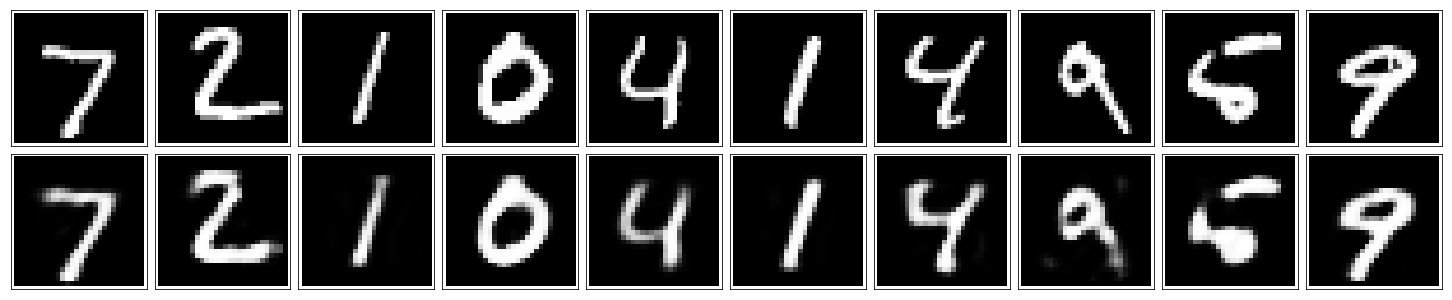

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.